# Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from py_wake.utils.plotting import setup_plot
from dynamiks.utils.test_utils import DefaultDWMFlowSimulation

fs = DefaultDWMFlowSimulation()
site = fs.site

## Views

DyWake provides a set of views:
- `XYView`: Horizontal
- `XZView`: Vertical plane parallel to the wind
- `YZView`: Vertical plane perpendicular to the wind 

Views can either be fixed (min, max and delta specified), e.g.

In [2]:
from dynamiks.views import XYView
xy_fixed = XYView(z=70, x=np.linspace(0,1000), y=np.linspace(-200,200), adaptive=False)

With this view, the turbulent wind speeds will be interpolated onto the requested grid. 

Adaptive views are faster as they uses the nearest existing turbulence grid point wind speeds

In [3]:
xy_adaptive = XYView(z=70, x=np.linspace(0,1000), y=np.linspace(-200,200), adaptive=True)

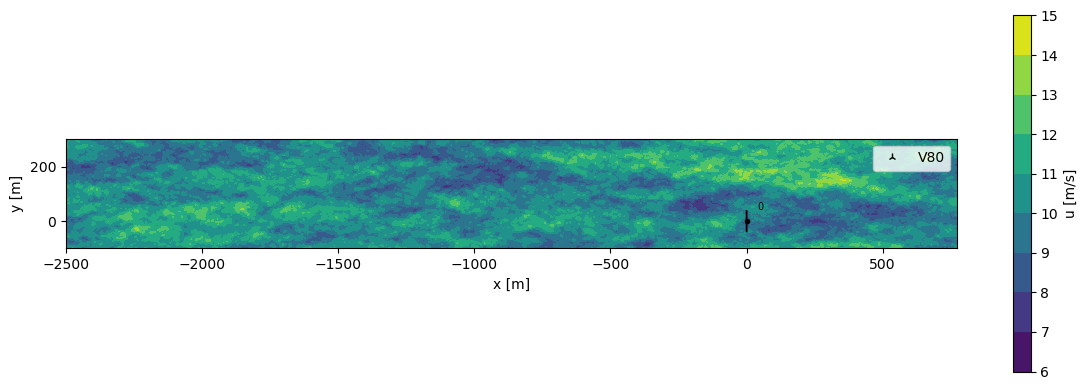

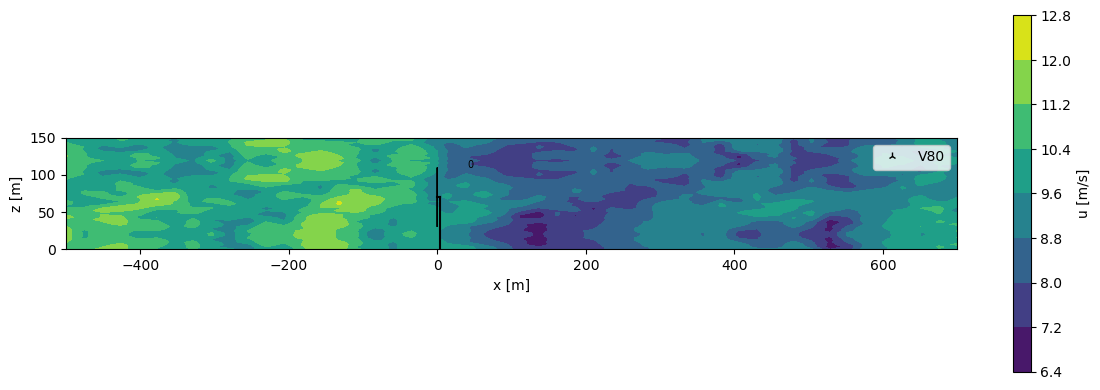

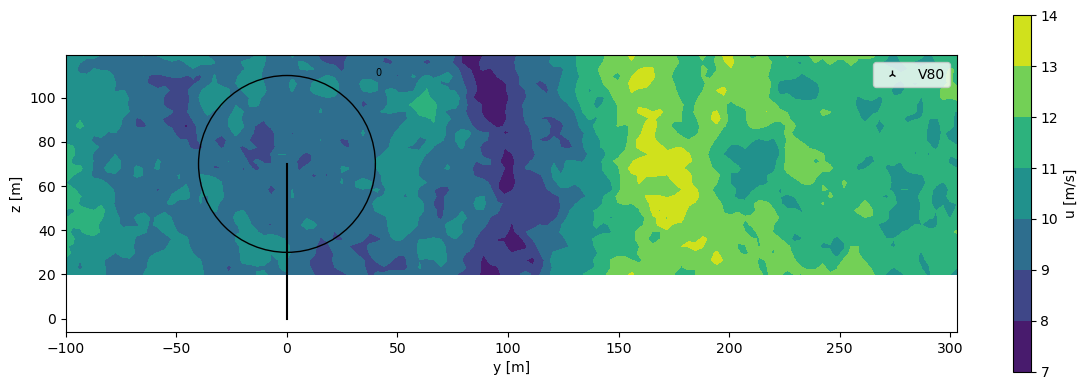

In [4]:
from dynamiks.views import XYView, XZView, YZView
for view in [XYView(z=70), # adaptive using all turbulence grid proints
             XZView(y=0, x=np.linspace(-500, 700), z=np.linspace(0,150), adaptive=False), # fixed view
             YZView(x=0)
             ]:
    plt.figure(figsize=(12,4))

    u,v,w = site.get_windspeed_grid(view)
    c = plt.contourf(*view.XY,u.squeeze().T)
    plt.colorbar(c, label='u [m/s]')
    view.get_plot_windturbines()(fs)
    plt.axis('scaled')
    setup_plot(xlabel=f'{view.plane[0]} [m]', ylabel=f'{view.plane[1]} [m]', grid=False)